In [13]:
from pyalgotrade import strategy  
from pyalgotrade.bar import Frequency  
from pyalgotrade.barfeed.csvfeed import GenericBarFeed  
from pyalgotrade.technical import ma 

# 1.构建一个策略  
class MyStrategy(strategy.BacktestingStrategy):  
    def __init__(self, feed, instrument):  
        super(MyStrategy, self).__init__(feed)  
        self.__sma = ma.SMA(feed[instrument].getCloseDataSeries(), 2)
        self.__instrument = instrument  
    
  
    def onBars(self, bars):# 每一个数据都会抵达这里，就像becktest中的next  
        bar = bars[self.__instrument]  
        self.info("%s %s" % (bar.getClose(), self.__sma[-1]))# 我们打印输出收盘价与两日均线值  
  
 

In [14]:
# 2.获得回测数据，官网来源于yahoo，由于墙的关系，我们用本地数据  
feed = GenericBarFeed(Frequency.DAY, None, None)  
feed.addBarsFromCSV("fd", "fd.csv")  
  
# 3.把策略跑起来  
myStrategy = MyStrategy(feed, "fd")  
myStrategy.run() 

2014-01-02 00:00:00 strategy [INFO] 1.558 None
2014-01-03 00:00:00 strategy [INFO] 1.535 1.5465
2014-01-06 00:00:00 strategy [INFO] 1.513 1.524
2014-01-07 00:00:00 strategy [INFO] 1.512 1.5125
2014-01-08 00:00:00 strategy [INFO] 1.513 1.5125
2014-01-09 00:00:00 strategy [INFO] 1.503 1.508
2014-01-10 00:00:00 strategy [INFO] 1.497 1.5
2014-01-13 00:00:00 strategy [INFO] 1.491 1.494
2014-01-14 00:00:00 strategy [INFO] 1.495 1.493
2014-01-15 00:00:00 strategy [INFO] 1.487 1.491
2014-01-16 00:00:00 strategy [INFO] 1.49 1.4885
2014-01-17 00:00:00 strategy [INFO] 1.473 1.4815
2014-01-20 00:00:00 strategy [INFO] 1.465 1.469
2014-01-21 00:00:00 strategy [INFO] 1.474 1.4695
2014-01-22 00:00:00 strategy [INFO] 1.513 1.4935
2014-01-23 00:00:00 strategy [INFO] 1.499 1.506
2014-01-24 00:00:00 strategy [INFO] 1.499 1.499
2014-01-27 00:00:00 strategy [INFO] 1.478 1.4885
2014-01-28 00:00:00 strategy [INFO] 1.486 1.482
2014-01-29 00:00:00 strategy [INFO] 1.492 1.489
2014-01-30 00:00:00 strategy [INFO] 

In [17]:
# coding=utf-8  
from pyalgotrade import strategy  
from pyalgotrade.bar import Frequency  
from pyalgotrade.barfeed.csvfeed import GenericBarFeed  
from pyalgotrade.technical import ma  
from pyalgotrade import plotter 
# 1.构建一个策略  
class MyStrategy(strategy.BacktestingStrategy):  
    def __init__(self, feed, instrument):  
        super(MyStrategy, self).__init__(feed)  
        self.__position  = None  
        self.__sma = ma.SMA(feed[instrument].getCloseDataSeries(), 150)  
        self.__instrument = instrument  
        self.getBroker()  
    def onEnterOk(self, position):  
        execInfo = position.getEntryOrder().getExecutionInfo()  
        self.info("BUY at %.2f" % (execInfo.getPrice()))  
  
    def onEnterCanceled(self, position):  
        self.__position = None  
  
    def onExitOk(self, position):  
        execInfo = position.getExitOrder().getExecutionInfo()  
        self.info("SELL at $%.2f" % (execInfo.getPrice()))  
        self.__position = None  
  
    def onExitCanceled(self, position):  
        # If the exit was canceled, re-submit it.  
        self.__position.exitMarket()  
  
  
    def onBars(self, bars):# 每一个数据都会抵达这里，就像becktest中的next  
        # SMA的计算存在窗口，所以前面的几个bar下是没有SMA的数据的.  
        if self.__sma[-1] is None:  
            return  
        #bar.getTyoicalPrice = (bar.getHigh() + bar.getLow() + bar.getClose())/ 3.0  
  
        bar = bars[self.__instrument]  
        # If a position was not opened, check if we should enter a long position.  
        if self.__position is None:# 如果手上没有头寸，那么  
            if bar.getPrice() > self.__sma[-1]:  
                # 开多，如果现价大于移动均线，且当前没有头寸.  
                self.__position = self.enterLong(self.__instrument, 100, True)  
        # 当前有多头头寸，平掉多头头寸.  
        elif bar.getPrice() < self.__sma[-1] and not self.__position.exitActive():  
            self.__position.exitMarket()  
  
# 2.获得回测数据，官网来源于yahoo，由于墙的关系，我们用本地数据  
feed = GenericBarFeed(Frequency.DAY, None, None)  
feed.addBarsFromCSV("fd", "fd.csv")  

2014-08-13 00:00:00 strategy [INFO] BUY at 1.65
2015-07-06 00:00:00 strategy [INFO] SELL at $2.84
2015-07-07 00:00:00 strategy [INFO] BUY at 2.68
2015-07-09 00:00:00 strategy [INFO] SELL at $2.53
2015-07-10 00:00:00 strategy [INFO] BUY at 2.74
2015-07-23 00:00:00 strategy [INFO] SELL at $2.74
2015-07-24 00:00:00 strategy [INFO] BUY at 2.79
2015-07-27 00:00:00 strategy [INFO] SELL at $2.72
2016-07-05 00:00:00 strategy [INFO] BUY at 2.17
2016-12-30 00:00:00 strategy [INFO] Final portfolio value: $1000107.80


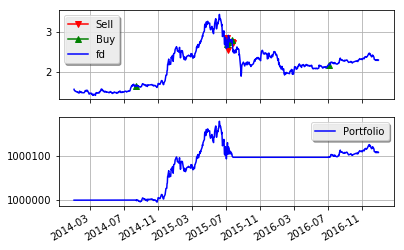

In [18]:
 # 3.把策略跑起来  
  
myStrategy = MyStrategy(feed, "fd")# 策略实例化  
plt = plotter.StrategyPlotter(myStrategy) # 传入策略  
myStrategy.run()# 运行策略  
myStrategy.info("Final portfolio value: $%.2f" % myStrategy.getResult())  
plt.plot()# 绘制  

In [21]:
# coding=utf-8  
from pyalgotrade import plotter  
from pyalgotrade.stratanalyzer import returns, sharpe, drawdown, trades  
from pyalgotrade import strategy  
from pyalgotrade.bar import Frequency  
from pyalgotrade.barfeed.csvfeed import GenericBarFeed  
from pyalgotrade.technical import ma  
# 1.构建一个策略  
class MyStrategy(strategy.BacktestingStrategy):  
    def __init__(self, feed, instrument):  
        super(MyStrategy, self).__init__(feed)  
        self.__position = None  
        self.__sma = ma.SMA(feed[instrument].getCloseDataSeries(), 150)  
        self.__instrument = instrument  
        self.getBroker()  
    def onEnterOk(self, position):  
        execInfo = position.getEntryOrder().getExecutionInfo()  
        self.info("BUY at %.2f" % (execInfo.getPrice()))  
  
    def onEnterCanceled(self, position):  
        self.__position = None  
  
    def onExitOk(self, position):  
        execInfo = position.getExitOrder().getExecutionInfo()  
        self.info("SELL at $%.2f" % (execInfo.getPrice()))  
        self.__position = None  
  
    def onExitCanceled(self, position):  
        # If the exit was canceled, re-submit it.  
        self.__position.exitMarket()  
  
    def getSMA(self):  
        return self.__sma  
  
    def onBars(self, bars):# 每一个数据都会抵达这里，就像becktest中的next  
  
        # Wait for enough bars to be available to calculate a SMA.  
        if self.__sma[-1] is None:  
            return  
        #bar.getTyoicalPrice = (bar.getHigh() + bar.getLow() + bar.getClose())/ 3.0  
  
        bar = bars[self.__instrument]  
        # If a position was not opened, check if we should enter a long position.  
        if self.__position is None:  
            if bar.getPrice() > self.__sma[-1]:  
                # 开多头.  
                self.__position = self.enterLong(self.__instrument, 100, True)  
        # 平掉多头头寸.  
        elif bar.getPrice() < self.__sma[-1] and not self.__position.exitActive():  
            self.__position.exitMarket()  
  
# 2.获得回测数据，官网来源于yahoo，由于墙的关系，我们用本地数据  
feed = GenericBarFeed(Frequency.DAY, None, None)  
feed.addBarsFromCSV("fd", "fd.csv")  
  
# 3.实例化策略  
myStrategy = MyStrategy(feed, "fd")  
# 4.设置指标和绘图  
sharpe_ratio = sharpe.SharpeRatio()  
myStrategy.attachAnalyzer(sharpe_ratio)  
drawDownAnalyzer = drawdown.DrawDown()
myStrategy.attachAnalyzer(drawDownAnalyzer)
plt = plotter.StrategyPlotter(myStrategy)  
  

2014-08-13 00:00:00 strategy [INFO] BUY at 1.65
2015-07-06 00:00:00 strategy [INFO] SELL at $2.84
2015-07-07 00:00:00 strategy [INFO] BUY at 2.68
2015-07-09 00:00:00 strategy [INFO] SELL at $2.53
2015-07-10 00:00:00 strategy [INFO] BUY at 2.74
2015-07-23 00:00:00 strategy [INFO] SELL at $2.74
2015-07-24 00:00:00 strategy [INFO] BUY at 2.79
2015-07-27 00:00:00 strategy [INFO] SELL at $2.72
2016-07-05 00:00:00 strategy [INFO] BUY at 2.17
2016-12-30 00:00:00 strategy [INFO] Final portfolio value: $1000107.80


sharpe_ratio 0.638985877904
Max. drawdown: 0.01 %


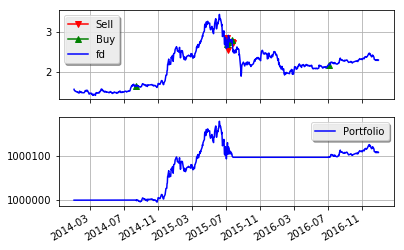

In [22]:
# 5.运行策略  
myStrategy.run()  
myStrategy.info("Final portfolio value: $%.2f" % myStrategy.getResult())  
  
# 6.输出夏普率、绘图  
print "sharpe_ratio", sharpe_ratio.getSharpeRatio(0)  
print "Max. drawdown: %.2f %%" % (drawDownAnalyzer.getMaxDrawDown() * 100)
plt.plot()  

2014-08-13 00:00:00 strategy [INFO] BUY at 1.65
2015-07-06 00:00:00 strategy [INFO] SELL at $2.84
2015-07-07 00:00:00 strategy [INFO] BUY at 2.68
2015-07-09 00:00:00 strategy [INFO] SELL at $2.53
2015-07-10 00:00:00 strategy [INFO] BUY at 2.74
2015-07-23 00:00:00 strategy [INFO] SELL at $2.74
2015-07-24 00:00:00 strategy [INFO] BUY at 2.79
2015-07-27 00:00:00 strategy [INFO] SELL at $2.72
2016-07-05 00:00:00 strategy [INFO] BUY at 2.17
2016-12-30 00:00:00 strategy [INFO] Final portfolio value: $1000010.76


total number of trades 4
commissions for each trade [ 0.004486  0.005211  0.005473  0.005512]


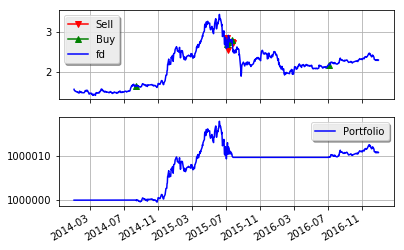

In [24]:
# coding=utf-8  
from pyalgotrade import plotter  
from pyalgotrade.stratanalyzer import returns, sharpe, drawdown, trades  
from pyalgotrade import strategy  
from pyalgotrade.bar import Frequency  
from pyalgotrade.barfeed.csvfeed import GenericBarFeed  
from pyalgotrade.technical import ma  
from pyalgotrade import broker  
# 1.构建一个策略  
class MyStrategy(strategy.BacktestingStrategy):  
    def __init__(self, feed, instrument, brk):  
        super(MyStrategy, self).__init__(feed, brk)  
        self.__position = None  
        self.__sma = ma.SMA(feed[instrument].getCloseDataSeries(), 150)  
        self.__instrument = instrument  
        self.getBroker()  
    def onEnterOk(self, position):  
        execInfo = position.getEntryOrder().getExecutionInfo()  
        self.info("BUY at %.2f" % (execInfo.getPrice()))  
  
    def onEnterCanceled(self, position):  
        self.__position = None  
  
    def onExitOk(self, position):  
        execInfo = position.getExitOrder().getExecutionInfo()  
        self.info("SELL at $%.2f" % (execInfo.getPrice()))  
        self.__position = None  
  
    def onExitCanceled(self, position):  
        # If the exit was canceled, re-submit it.  
        self.__position.exitMarket()  
  
    def getSMA(self):  
        return self.__sma  
  
    def onBars(self, bars):# 每一个数据都会抵达这里，就像becktest中的next  
  
        # Wait for enough bars to be available to calculate a SMA.  
        if self.__sma[-1] is None:  
            return  
        #bar.getTyoicalPrice = (bar.getHigh() + bar.getLow() + bar.getClose())/ 3.0  
  
        bar = bars[self.__instrument]  
        # If a position was not opened, check if we should enter a long position.  
        if self.__position is None:  
            if bar.getPrice() > self.__sma[-1]:  
                # 开多头.  
                self.__position = self.enterLong(self.__instrument, 10, True)  
        # 平掉多头头寸.  
        elif bar.getPrice() < self.__sma[-1] and not self.__position.exitActive():  
            self.__position.exitMarket()  
  
# 2.获得回测数据，官网来源于yahoo，由于墙的关系，我们用本地数据  
feed = GenericBarFeed(Frequency.DAY, None, None)  
feed.addBarsFromCSV("fd", "fd.csv")  
# 3.broker setting  
# 3.1 commission类设置  
broker_commission = broker.backtesting.TradePercentage(0.0001)  
# 3.2 fill strategy设置  
fill_stra = broker.fillstrategy.DefaultStrategy(volumeLimit=0.1)  
sli_stra = broker.slippage.NoSlippage()  
fill_stra.setSlippageModel(sli_stra)  
# 3.3完善broker类  
brk = broker.backtesting.Broker(1000000, feed, broker_commission)  
brk.setFillStrategy(fill_stra)  
# 4.把策略跑起来  
  
myStrategy = MyStrategy(feed, "fd", brk)  
  
# Attach a returns analyzers to the strategy.  
trade_situation = trades.Trades()  
myStrategy.attachAnalyzer(trade_situation)  
# Attach the plotter to the strategy.  
plt = plotter.StrategyPlotter(myStrategy)  
  
# Run the strategy.  
myStrategy.run()  
myStrategy.info("Final portfolio value: $%.2f" % myStrategy.getResult())  
print "total number of trades", trade_situation.getCount()  
print "commissions for each trade",trade_situation.getCommissionsForAllTrades()  
# Plot the strategy.  
plt.plot()  